# IRIS Flower Classification

### import required libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-dark-palette')

In [2]:
%time data = pd.read_csv('data/iris.csv')

CPU times: user 2.99 ms, sys: 1.36 ms, total: 4.35 ms
Wall time: 3.26 ms


### Exploratory Data Analysis

In [3]:
# checking the info of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- We have 4 float type colums and 1 categorial type column.
- ID column is not useful so lets remove this.

In [4]:
data = data.drop(['Id'], axis=1)

In [5]:
# checking shape of data
data.shape

(150, 5)

Data contains 150 samples and 5 features.
Features are:
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [6]:
# checking for all the null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing value in the data.

In [7]:
# summary statistics of quantitative variables
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Look for the category distribution in categorical columns

In [8]:
data["Species"].value_counts() / len(data)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

Our data is distributed equally. Means each class have equal samples.

### How data is distributed on each feature

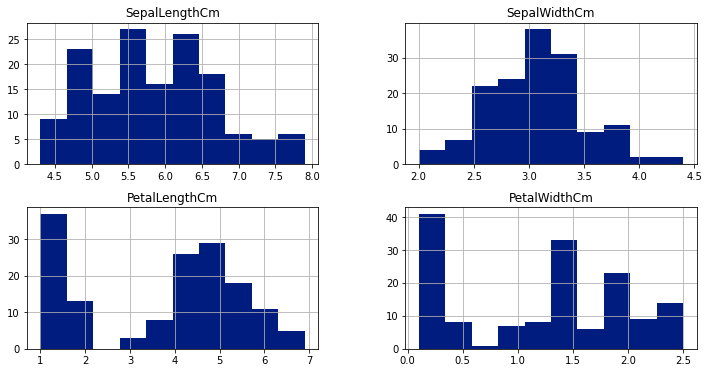

In [9]:
data.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Now lets see how data distributed based on species.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

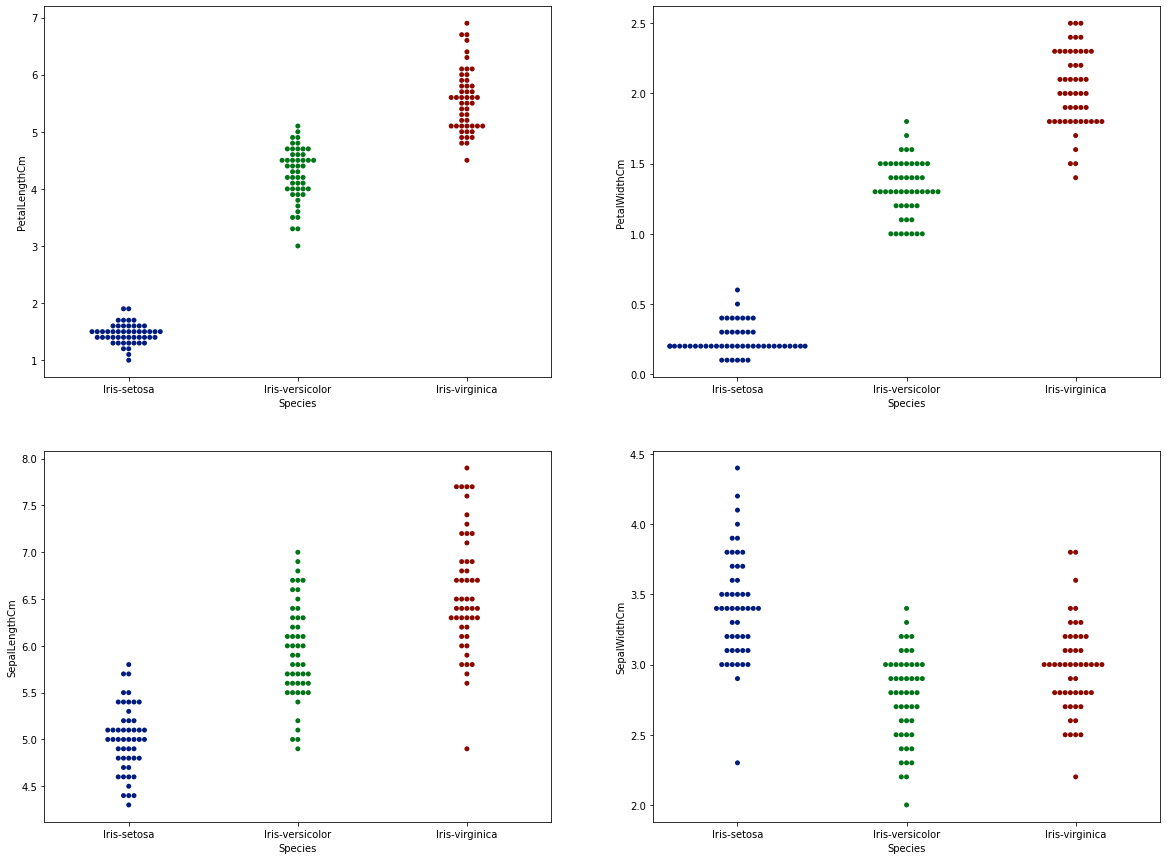

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='SepalWidthCm',data=data)

Now lets plot the count of each Species.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

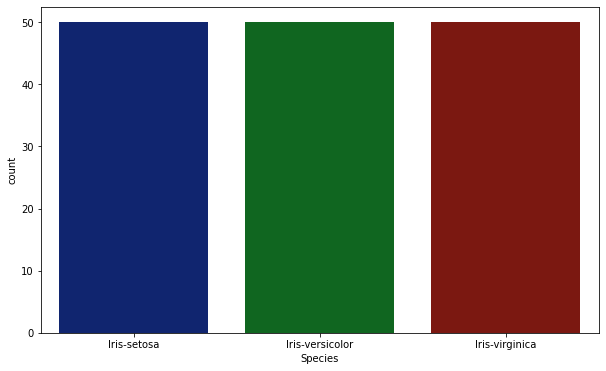

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data.Species)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

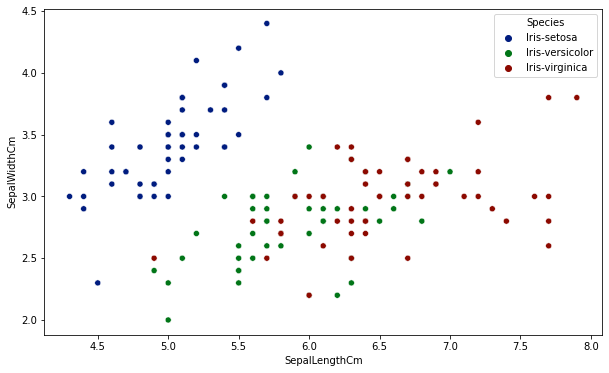

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

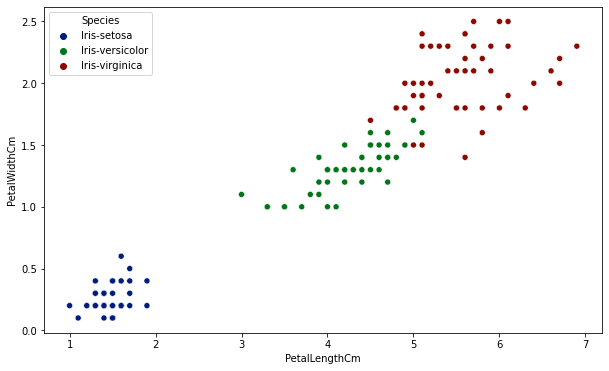

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)

#### Plot for correlation

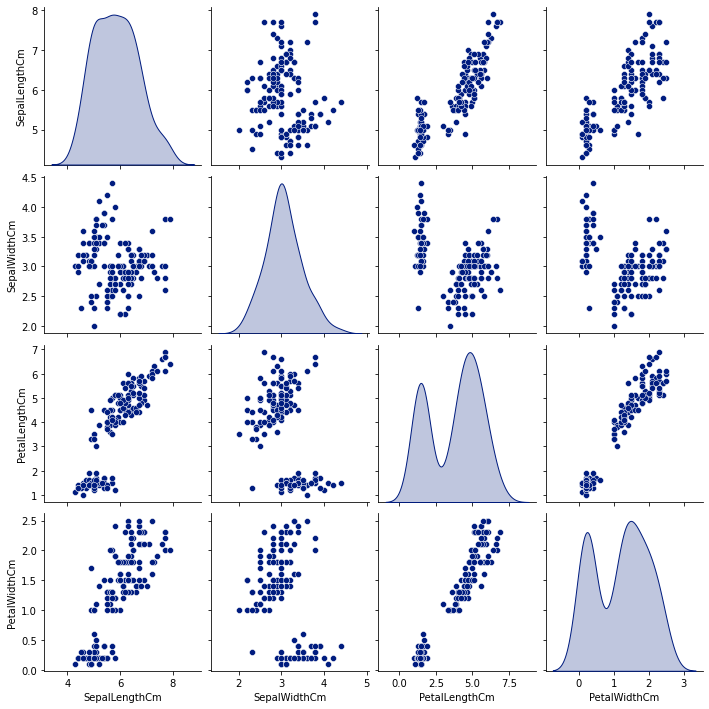

In [14]:
## pairplots to get an intuition of potential correlations
sns.pairplot(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]], diag_kind="kde")

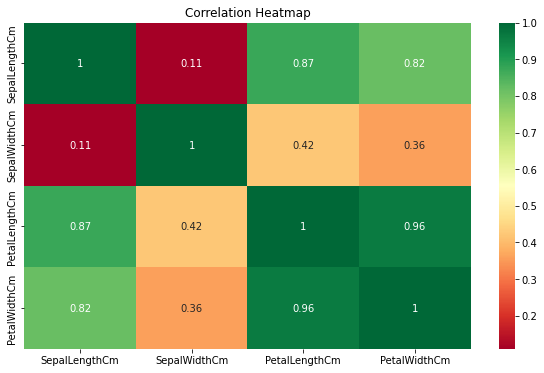

In [15]:
plt.figure(figsize=(10,6))
#draws  heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(data.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Cluster Heatmap')

<Figure size 720x432 with 0 Axes>

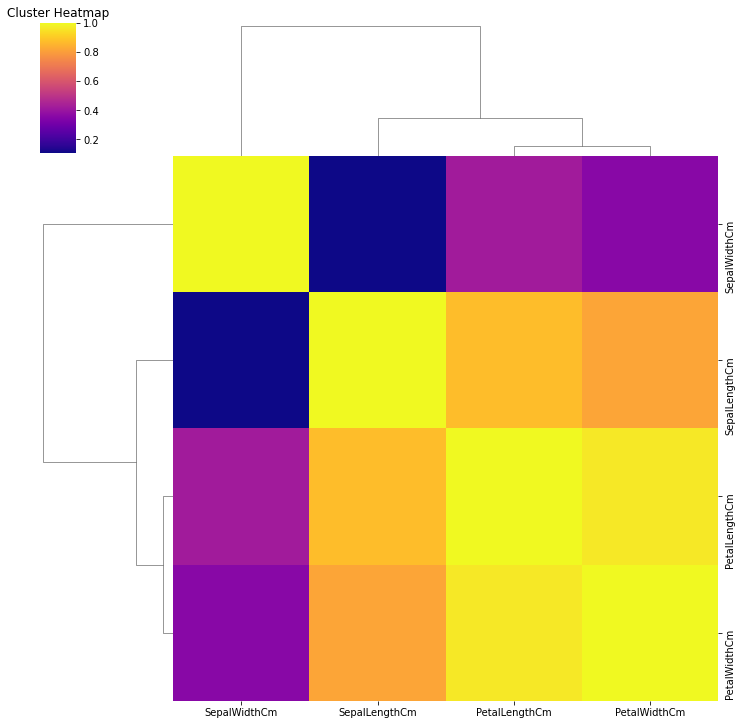

In [16]:
plt.figure(figsize=(10,6))
sns.clustermap(data.corr().abs(), cmap='plasma')
plt.title('Cluster Heatmap')

## Split Data in train and test
There are many ways to split the data into training and testing sets but we want our test set to represent the overall population and not just a few specific categories. Thus, instead of only using simple and common `train_test_split()` method from sklearn, we also use stratified sampling.

> Stratified Sampling — We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Species"]):
    train_set_strat = data.loc[train_index]
    test_set_strat = data.loc[test_index]

In [18]:
##checking category distribution in training set
train_set_strat['Species'].value_counts() / len(train_set_strat)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [19]:
test_set_strat["Species"].value_counts() / len(test_set_strat)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [20]:
train_set_strat_x = train_set_strat.copy().drop(['Species'], axis=1)
train_set_strat_y = train_set_strat['Species']

In [21]:
test_set_strat_x = test_set_strat.copy().drop(['Species'], axis=1)
test_set_strat_y = test_set_strat['Species']

In [22]:
train_set_strat_x.shape, train_set_strat_y.shape, test_set_strat_x.shape, test_set_strat_y.shape

((120, 4), (120,), (30, 4), (30,))

## Selecting and Training Machine Learning Models

Since this is classification problem, I am choosing following classification algorithms.
1. Logistic Regression
2. k-NN Classification
3. SVM Classification
4. Random Forest CLassifiation
5. Decision Trees Classification
6. XGBoost Classification

In [23]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree algoithm
from sklearn.svm import SVC, LinearSVC #for Support Vector Machine (SVM) algorithm
from sklearn.ensemble import RandomForestClassifier # for Random Forest algorithm
from sklearn.naive_bayes import GaussianNB # for Gaussian Naive bayes algorithm

## KNN Classifier¶

In [24]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_set_strat_x, train_set_strat_y)
knn_Y_pred = knn.predict(test_set_strat_x)
knn_accuracy=metrics.accuracy_score(test_set_strat_y,knn_Y_pred)*100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracy) )

Accuracy on training dataset : 93.33%


In [25]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, knn_Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



### Fine-Tuning Hyperparameters for kNN

In [26]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(train_set_strat_x, train_set_strat_y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [27]:
print(grid_search.best_params_)

{'n_neighbors': 13}


In [28]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.67%


### Checking Accuracy on Test Data

As we know `k=13` gives best result. Thus, initializing new model with `k=13`.

In [29]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(train_set_strat_x, train_set_strat_y)

y_test_hat = knn.predict(test_set_strat_x) 

test_accuracy=metrics.accuracy_score(test_set_strat_y, y_test_hat) * 100

print("Accuracy on testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy on testing dataset with tuning is : 100.00%


In [30]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, y_test_hat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


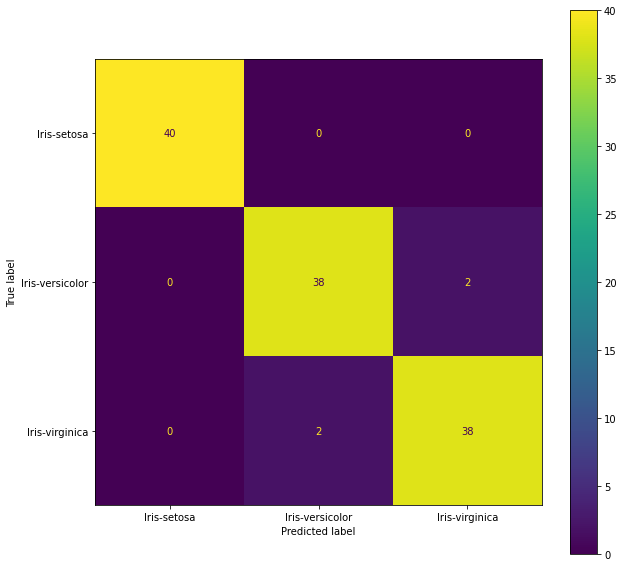

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(grid, train_set_strat_x, train_set_strat_y, values_format='d', ax=ax)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


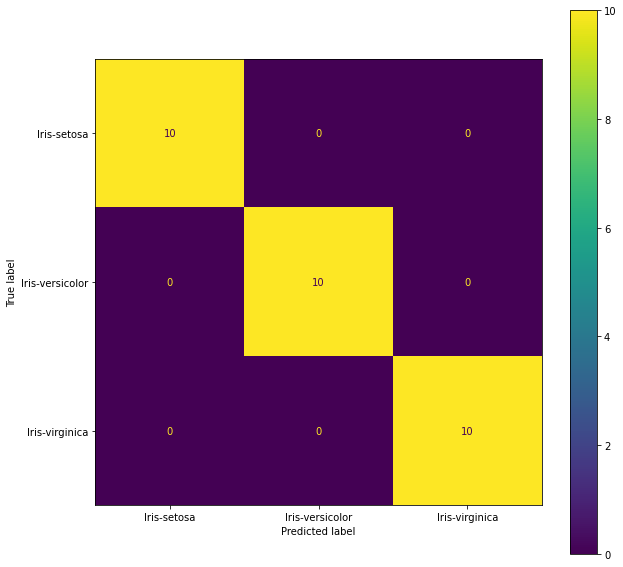

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(grid, test_set_strat_x, test_set_strat_y, values_format='d', ax=ax)